In [18]:
from langchain_mcp_adapters.client import MultiServerMCPClient
from langgraph.prebuilt import create_react_agent
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv(override=True)

True

# Basic

In [19]:
async def get_tools():
    # 서버 설정 정의
    server_config = {
        "search": {
            "url": "http://localhost:8000/mcp",
            "transport": "sse",
            },
        }

    # 1. 'async with'를 제거하고 클라이언트를 직접 생성합니다.
    client = MultiServerMCPClient(server_config)
    
    # 2. 'await'를 사용하여 비동기적으로 도구를 가져옵니다.
    tools = await client.get_tools()
    return tools

tools = await get_tools()
tool_names = [tool.name for tool in tools]
print(tool_names)
tools

['web_search', 'wiki_search', 'arxiv_search']


[StructuredTool(name='web_search', description='Do Search\n\n### Responses:\n\n**200**: Successful Response (Success Response)\nContent-Type: application/json\n\n**Output Schema:**\n```json\n{}\n```\n**422**: Validation Error\nContent-Type: application/json\n\n**Example Response:**\n```json\n{\n  "detail": [\n    {\n      "loc": [],\n      "msg": "Message",\n      "type": "Error Type"\n    }\n  ]\n}\n```\n\n**Output Schema:**\n```json\n{\n  "properties": {\n    "detail": {\n      "items": {\n        "properties": {\n          "loc": {\n            "items": {},\n            "type": "array",\n            "title": "Location"\n          },\n          "msg": {\n            "type": "string",\n            "title": "Message"\n          },\n          "type": {\n            "type": "string",\n            "title": "Error Type"\n          }\n        },\n        "type": "object",\n        "required": [\n          "loc",\n          "msg",\n          "type"\n        ],\n        "title": "ValidationEr

In [20]:
import nest_asyncio
import asyncio

nest_asyncio.apply()
from langchain_mcp_adapters.client import MultiServerMCPClient
# Add other necessary imports like ChatGroq, create_react_agent etc.

async def main(tools:list, query:str):

    # 서버 설정 정의
    server_config = {
        "search": {
            "url": "http://localhost:8000/mcp",
            "transport": "sse",
            },
        }

    # 1. 'async with'를 제거하고 클라이언트를 직접 생성합니다.
    client = MultiServerMCPClient(server_config)
    
    # 2. 'await'를 사용하여 비동기적으로 도구를 가져옵니다.
    tools = await client.get_tools()
    
    model = ChatGroq(
            model= "qwen/qwen3-32b", 
            temperature=0.5,
            max_tokens=1000,
            )
        
    prompt = """
        You are the Smart AI Assistant in a company.
        Based on the result of tool calling, Generate a consice and logical answer.
        and if there is no relevant infomation in the tool calling result, Just say 'I don't know'
        """
    
    agent = create_react_agent(model=model, tools=tools, prompt=prompt)
    
    inputs = {"messages": [("user", query)]}
    return await agent.ainvoke(inputs, stream_mode="values")

In [21]:
sel_tools = tools[:]
sel_tools

[StructuredTool(name='web_search', description='Do Search\n\n### Responses:\n\n**200**: Successful Response (Success Response)\nContent-Type: application/json\n\n**Output Schema:**\n```json\n{}\n```\n**422**: Validation Error\nContent-Type: application/json\n\n**Example Response:**\n```json\n{\n  "detail": [\n    {\n      "loc": [],\n      "msg": "Message",\n      "type": "Error Type"\n    }\n  ]\n}\n```\n\n**Output Schema:**\n```json\n{\n  "properties": {\n    "detail": {\n      "items": {\n        "properties": {\n          "loc": {\n            "items": {},\n            "type": "array",\n            "title": "Location"\n          },\n          "msg": {\n            "type": "string",\n            "title": "Message"\n          },\n          "type": {\n            "type": "string",\n            "title": "Error Type"\n          }\n        },\n        "type": "object",\n        "required": [\n          "loc",\n          "msg",\n          "type"\n        ],\n        "title": "ValidationEr

In [23]:

# Example of how to run it (assuming the rest of the code is defined)
async def run_example():
    try:
        query = "knowledge distillation regarding large language models?"
        result = await main(tools=sel_tools, query=query)
        return result
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

result = asyncio.run(run_example())
result

{'messages': [HumanMessage(content='knowledge distillation regarding large language models?', additional_kwargs={}, response_metadata={}, id='afaa2338-936c-4d58-9b6e-6931a3d5c42e'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about knowledge distillation in the context of large language models. Let me start by recalling what knowledge distillation is. From what I remember, it\'s a technique where a smaller model, called the student model, is trained to mimic the behavior of a larger, more complex model known as the teacher model. The idea is to transfer the knowledge from the teacher to the student so that the student can achieve similar performance but with lower computational costs.\n\nNow, applying this to large language models (LLMs), the teacher model would typically be a massive LLM like GPT-3 or BERT, and the student model would be a more compact version, such as DistilBERT. The user might be interested in how exactly this process wo

In [7]:
print(result["messages"][1].additional_kwargs["reasoning_content"])

Okay, the user asked about "knowledge distillation." I need to figure out which tool to use here. The available tools are web_search, wiki_search, and arxiv_search. 

First, I should consider what knowledge distillation is. It's a machine learning technique where a smaller model, called the student model, is trained to mimic the behavior of a larger, more complex model, known as the teacher model. The goal is to transfer the knowledge from the teacher to the student so that the student can perform well while being more efficient.

Now, the user might be looking for a general explanation, or they might want recent research papers on the topic. Since the tools include arxiv_search, which is good for academic papers, and wiki_search for encyclopedic info, and web_search for general information.

If I use arxiv_search, I can find recent studies or detailed papers on knowledge distillation. The user might benefit from knowing the latest advancements. Alternatively, wiki_search could provide

In [ ]:
result["messages"][1].additional_kwargs["tool_calls"][0]["function"]["name"]

In [ ]:
result["messages"][2].content

In [ ]:
print(result["messages"][-1].content)

# Langraph Style

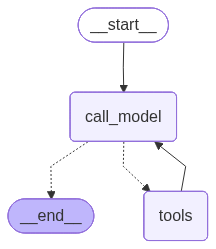

In [26]:
from langchain_mcp_adapters.client import MultiServerMCPClient
from langgraph.graph import StateGraph, MessagesState, START
from langgraph.prebuilt import ToolNode, tools_condition

from langchain.chat_models import init_chat_model
# model = init_chat_model("openai:gpt-4.1")
model = ChatGroq(
            model= "qwen/qwen3-32b", 
            temperature=0.5,
            max_tokens=1000,
            )

server_config = {
        "search": {
            "url": "http://localhost:8000/mcp",
            "transport": "sse",
            },
        }

client = MultiServerMCPClient(server_config)
tools = await client.get_tools()

def call_model(state: MessagesState):
    
    response = model.bind_tools(tools).invoke(state["messages"])
    return {"messages": response}

builder = StateGraph(MessagesState)
builder.add_node(call_model)
builder.add_node(ToolNode(tools))
builder.add_edge(START, "call_model")
builder.add_conditional_edges(
    "call_model",
    tools_condition,
)
builder.add_edge("tools", "call_model")
graph = builder.compile()
graph

In [27]:
response = await graph.ainvoke({"messages": "knowledge distillation regarding large language models?"})
response

{'messages': [HumanMessage(content='knowledge distillation regarding large language models?', additional_kwargs={}, response_metadata={}, id='da742d3d-fbf9-4c03-b3f5-54e5fb13b0e9'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about knowledge distillation in the context of large language models. Let me start by recalling what knowledge distillation is. From what I remember, it\'s a technique where a smaller model, called the student model, is trained to mimic the behavior of a larger, more complex model known as the teacher model. The idea is to transfer the knowledge from the teacher to the student so that the student can achieve similar performance but with lower computational costs.\n\nNow, applying this to large language models (LLMs), the teacher model would typically be a massive model like GPT-3 or BERT, and the student model would be a more compact version. The user might be interested in how this process works specifically for LLMs,

In [47]:
thinking = ""
answer = ""
async for msg, metadata in graph.astream({"messages": "knowledge distillation regarding large language models?"}, stream_mode="messages"):
    print(msg)


content='' additional_kwargs={} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': 'Okay'} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': ','} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': ' the'} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': ' user'} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': ' is'} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': ' asking'} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='' additional_kwargs={'reasoning_content': ' about'} response_metadata={} id='run--3218f831-2b43-48dc-af06-8b9f2156970b'
content='

APIStatusError: Error code: 413 - {'error': {'message': 'Request too large for model `qwen/qwen3-32b` in organization `org_01hrm502bcfvcas4j2ppdwhsxf` service tier `on_demand` on tokens per minute (TPM): Limit 6000, Requested 43538, please reduce your message size and try again. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

In [38]:
msg

AIMessageChunk(content='', additional_kwargs={}, response_metadata={'finish_reason': 'length', 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand'}, id='run--db23fa6b-3e56-49d3-9a67-14cf5c5b2b94', usage_metadata={'input_tokens': 1227, 'output_tokens': 1000, 'total_tokens': 2227})